# Clustering Beer Brands

In [1]:
# Import package and dataset
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

path = r'Z:\RevMgmt\RB Projects\AOD Data\Clustering Data.txt'
beer_data = pd.read_csv(path,sep = ' ')

In [2]:
beer_data

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [3]:
# Define X
X = beer_data.drop('name',axis = 1)

## Part 1: K-means Clustering 

In [4]:
# K-means with 3 clusters
km = KMeans(n_clusters = 3,random_state = 1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [5]:
# Review the cluster labels
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1])

In [6]:
# Save the cluster labels and sort by cluster
beer_data['cluster'] = km.labels_
beer_data.sort_values('cluster', inplace = True)

In [7]:
# Review the cluster centers
km.cluster_centers_

array([[150.        ,  17.        ,   4.52142857,   0.52071429],
       [102.75      ,  10.        ,   4.075     ,   0.44      ],
       [ 70.        ,  10.5       ,   2.6       ,   0.42      ]])

In [8]:
# Calculate the mean of each feature for each cluster
beer_data.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


In [9]:
# Save the DataFrame of cluster centers
centers = beer_data.groupby('cluster').mean()

In [10]:
# Plot with colors
colors = np.array(['red','green','blue','yellow'])
plt.rcParams['font.size'] = 14

Text(0, 0.5, 'alcohol')

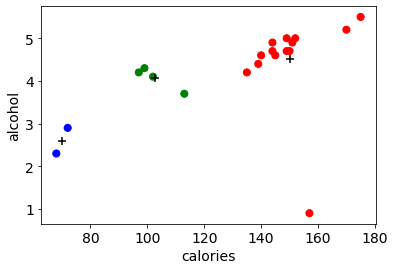

In [11]:
# Scatter plot of calories vs. alcohol, colored by cluster (0=red, 1=green, 2=blue, 3=yellow)
plt.scatter(beer_data.calories, beer_data.alcohol, c=colors[beer_data.cluster], s = 50)

# Mark cluster centers as '+'
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker = '+', s = 50, c = 'black')

# Add labels
plt.xlabel('calories')
plt.ylabel('alcohol')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C59A7D4608>,
      dtype=object)

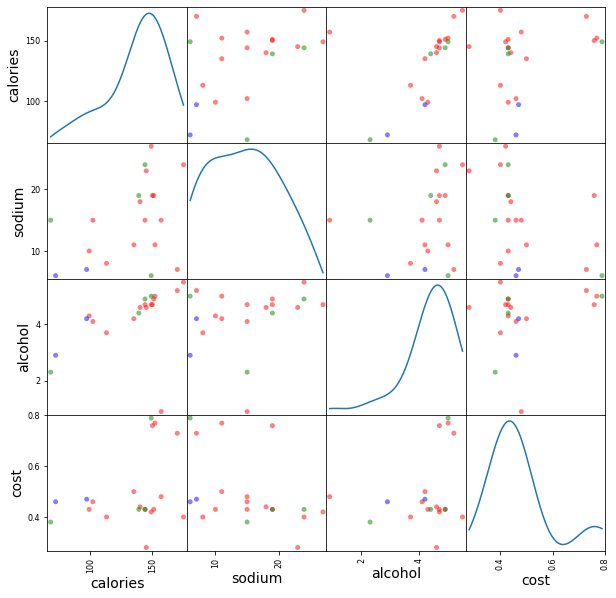

In [12]:
# Pandas scatter_matrix (0=red, 1=green, 2=blue)
scatter_matrix(X,c=colors[beer_data.cluster], figsize = (10,10), s = 100, diagonal = 'kde')

## Repeat with Scaled Data 

In [13]:
# Center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [15]:
# save the cluster labels and sort by cluster
beer_data['cluster'] = km.labels_
beer_data.sort_values('cluster', inplace = True)

In [16]:
# Review the cluster centers
beer_data.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,137.875,18.50,4.6625,0.41625
1,120.375,13.25,3.6125,0.48750
2,146.250,11.25,4.6500,0.66500


In [17]:
# Scatter plot matrix of new cluster assignments
#pd.scatter_matrix(X, c=colors[beer_data.cluster], figsize = (10,10), s = 100)

## Part 2: Clustering Evaluation
Using Silhouette Coefficient

In [18]:
# Calculate Silhouette Coefficient for K=3
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.45777415910909475

In [19]:
# Calculate Silhouette Coefficient for K=2 - K=19
k_range = range(2,20)
scores = []

# Loop through ranges
for k in k_range:
    km = KMeans(n_clusters = k, random_state = 1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

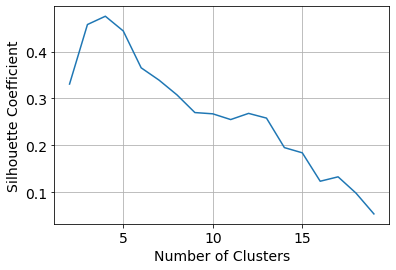

In [20]:
# Plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [21]:
# K-means iwth 4 clusters on scaled data
km = KMeans(n_clusters = 4, random_state = 1)
km.fit(X_scaled)
beer_data['cluster'] = km.labels_
beer_data.sort_values('cluster', inplace = True)

## Part 3: DBSCAN Clustering

In [22]:
# DBSCAN with eps = 1 and min_samples = 3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 1, min_samples = 3)
db.fit(X_scaled)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [23]:
# Review the cluster labels
db.labels_

array([ 0,  0, -1,  1,  1, -1, -1,  0,  2,  2,  0,  2,  0, -1,  1, -1,  0,
        0, -1,  2], dtype=int64)

In [24]:
# Save cluster labels and sort by cluster
beer_data['cluster'] = db.labels_
beer_data.sort_values('cluster',inplace = True)

In [25]:
# Review the cluster centers
beer_data.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
-1,135.500000,15.666667,3.833333,0.495000
0,127.857143,15.285714,4.314286,0.452857
1,165.000000,16.666667,5.133333,0.630000
2,112.000000,12.000000,4.050000,0.465000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C59BB5EFC8>,
      dtype=object)

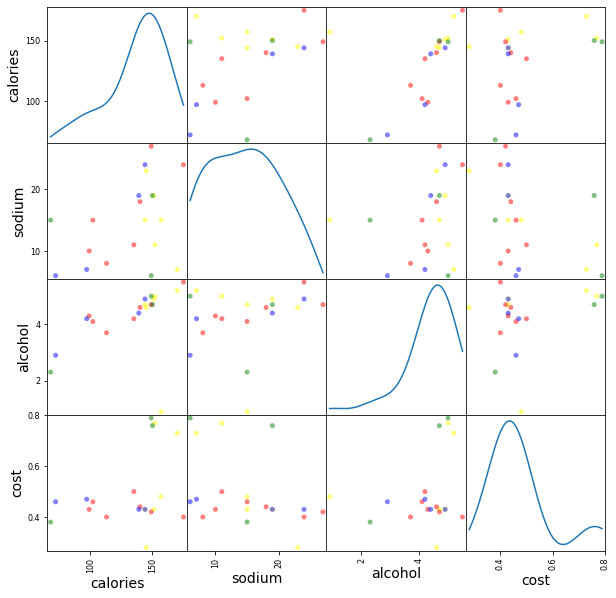

In [28]:
# Pandas scatter_matrix of DBSCAN cluster assignements (0=Red, 1=Green, 2=Blue, -1=Yellow)
scatter_matrix(X,c=colors[beer_data.cluster], figsize = (10,10), s = 100, diagonal = 'kde')